In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ?disabling the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Json packages
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Data Gathering

####  1: comma separated values (csv) data source loading

In [4]:
# Data loading and processing
data = pd.read_csv("twitter-archive-enhanced-2.csv")
# creating a local data copy
df = data.copy()

#### 2 : tab separated values file (tsv)

In [5]:
image = pd.read_csv("image-predictions-3.tsv",sep = "\t")
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# understanding the image summary statistics
image.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [7]:
# processing the image data
link = []
img_name = []
img_media = []
extension=[]
for x in range(0,len(image)):
    extension = image['jpg_url'][x].split(".")
#     link = image['jpg_url'][x].split(".")[-1]
#     img_media = image['jpg_url'][x].split(".")[-1]
    link.append(extension)
tsv_data = pd.DataFrame(link,columns =['link',"image_name","image_media","image_format"])
print(tsv_data.head())
print('################################################################')
print('The shape of data is as shown below')
print(tsv_data.shape)


          link image_name                image_media image_format
0  https://pbs      twimg  com/media/CT4udn0WwAA0aMy          jpg
1  https://pbs      twimg  com/media/CT42GRgUYAA5iDo          jpg
2  https://pbs      twimg  com/media/CT4521TWwAEvMyu          jpg
3  https://pbs      twimg  com/media/CT5Dr8HUEAA-lEu          jpg
4  https://pbs      twimg  com/media/CT5IQmsXIAAKY4A          jpg
################################################################
The shape of data is as shown below
(2075, 4)


#### JSON- api data loading

In [8]:
json_list = []
testlist = []
with open('tweet_json.txt') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        entities = tweets['entities']
        full_text = tweets['full_text']
        created_at = tweets['created_at']
        display_text_range = tweets['display_text_range']
        user = tweets['user']
        testlist.append(tweets)
#         print(testlist)
        json_list.append({'tweet_id':tweet_id,
                         'retweet_count':retweet_count,
                         'favorite_count':favorite_count,
                          'full_text': full_text,
                          'entities' : entities,
                          'created_at': created_at,
                          'display_text_range':display_text_range,
                          'user':user
                         })
json_data = pd.DataFrame(json_list,columns=['created_at','tweet_id','user','retweet_count','display_text_range','favorite_count','full_text','entities'])
json_data.head()
print(f"the shape of the data is :{json_data.shape} ")
print("--------------------------------------------------")
print(json_data.describe())


print("--------------------------------------------------")
json_data.info()


the shape of the data is :(2354, 8) 
--------------------------------------------------
           tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          2354 non-null   object
 1   tweet_id            2354 non-null   int64 
 2   user                2354 non-null   object
 3   retweet_count       2354 non-null   int64 
 4   dis

#### Data Assessment

#### 1:  Visual Assessment

In [9]:
# printing the head of the data
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# printing the tail of the data
data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
# getting the sample data values
data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
303,836397794269200385,NaN,NaN,2017-02-28 02:09:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,8.178278e+17,4.196984e+09,2017-01-07 20:18:46 +0000,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,None,None,None,None
249,845306882940190720,NaN,NaN,2017-03-24 16:10:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845306882...,12,10,Pickles,None,None,pupper,None
1968,673320132811366400,NaN,NaN,2015-12-06 01:56:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None


In [12]:
# understanding the data summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [13]:
# getting the data types and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2 : Programmatic Assessment

In [14]:
data.T.shape

(17, 2356)

In [15]:
data[(data.doggo!="None") & (data.floofer!="None") ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [16]:
data[(data.pupper !="None") & (data.floofer!="None") ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

"""tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
p1_conf is how confident the algorithm is in its #1 prediction → 95%
p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
p2 is the algorithm's second most likely prediction → Labrador retriever
p2_conf is how confident the algorithm is in its #2 prediction → 1%
p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc."""

visual assessment and observations made

#### Data Tidyness:
   A)  data stacture is not tidy as observed.
    very variable does not form a column in the dataset, there are columns in the likes of entities with more variables in them. this thus disagrees with the rules of tidy data. Every column being a variable.<br>
    B) it can be observed tha not every cell is not a single value. there are cell observed to contain multiples elements in them. a good example as observed was the cell of belonging to the column users. it had the details of the user within the same cell. This bridge the rule of having a single element in a single single. <br>
    C) The data semantic is also observed to have been compromised, for instance. the columns doggo, floofer, pupper and puppo are the dogs breeds and needed to have been stored in a single.

In [18]:
# Data Understanding
# we need to tidy the columns doggo,floofer, pupper and puppo to make a single column of breeds
breeds = data[['doggo', 'floofer', 'pupper', 'puppo']]
breeds.columns.to_list()

['doggo', 'floofer', 'pupper', 'puppo']

In [19]:
# data.columns.to_list()

In [20]:
# perfoming a melt on the data
data_with_breeds=pd.melt(data,
        id_vars=['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',],
       value_vars=breeds.columns.to_list(),
       value_name='Breed',)
data.shape,data.shape

((2356, 17), (2356, 17))

In [21]:
data_with_breeds.shape

(9424, 15)

<AxesSubplot:>

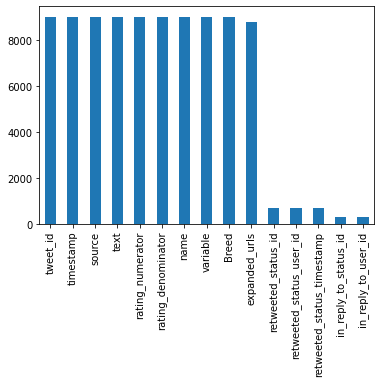

In [22]:
# checking for the distributioin of None values in the dataset
data_with_breeds[data_with_breeds.Breed=="None"].count().sort_values(ascending=False).plot(kind='bar')
# it appears the columns that are not much affected by the None probles are only the three, retweetd status, retweeted status user id, timestamp reply status and reply user id
# quite insightfull. most tweets were actually replied and that is what we are noticing.

<AxesSubplot:>

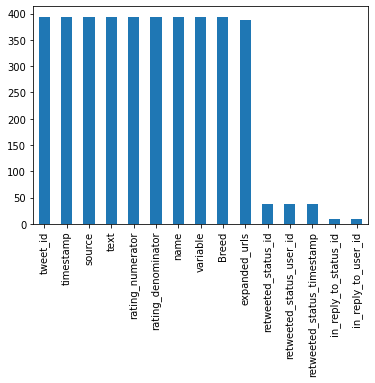

In [23]:
data_with_breeds[data_with_breeds.Breed!="None"].count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

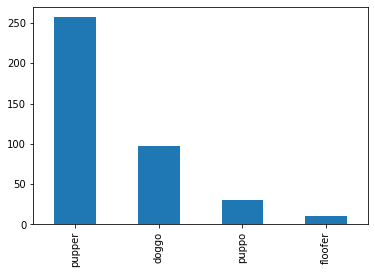

In [24]:
data_with_breeds[data_with_breeds.Breed!="None"].Breed.value_counts().plot(kind='bar',)

In [25]:
print(data.shape,data_with_breeds[data_with_breeds.Breed!="None"].shape)

(2356, 17) (394, 15)


In [26]:
data_with_breeds[(data_with_breeds.Breed!="None") & (data_with_breeds.name!='None')].shape

(226, 15)

In [27]:
data = data_with_breeds[(data_with_breeds.Breed!="None") & (data_with_breeds.name!='None')]
data.shape

(226, 15)

In [28]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<AxesSubplot:>

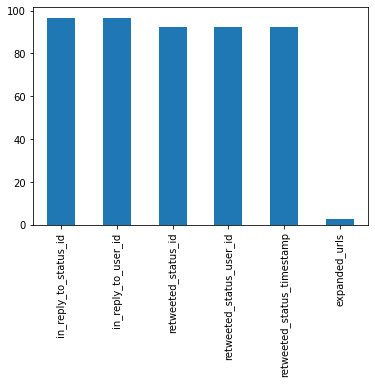

In [29]:
missing_ration = (df.isna().sum()/df.shape[0])*100
missing_percentage = missing_ration[missing_ration.values > 0.0].sort_values(ascending=False)
missing_percentage.plot(kind='bar')
# all this columns are missing data, we cant drop them as it would not be prudent. best approach is to fill them with 0.
# this is becouse, tweet as a coplumn for instance must not neccessarity have a retweet. so if a user tweeted and the tweet was not reacted to.

#### 2: Data Quality Issues
 a) the data has numerous missing values, this can be seen from the nan values in the cells <br>
 b) there is data inconsistency being observed, specifically the records. <br>
 c) a significant percentage of data had none data items. this means the data cant be operated upon as none cant be statistically operated upon. <br>
 d) 

In [30]:
data.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,variable,Breed
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,doggo


In [31]:
expanded_urls=pd.DataFrame(data['expanded_urls'])

In [32]:
def split_expanded_urls(col):
    for x in range(len(col)):
        temp =col.iloc[x]
    return temp

In [33]:
data['expanded_urls'].isna().sum()
data['expanded_urls'] = data['expanded_urls'].fillna("")

In [34]:
df.expanded_urls.str.split('/').sample(5).iloc[1][3:]
# df.expanded_urls

['dog_rates', 'status', '668636665813057536', 'photo', '1']

In [35]:
df.expanded_urls=df.expanded_urls.fillna("")

In [36]:
df.expanded_urls.isna().sum()

0

In [37]:
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,variable,Breed
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,doggo
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,doggo
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,doggo
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,doggo


In [38]:
data.source

9       <a href="http://twitter.com/download/iphone" r...
43      <a href="http://twitter.com/download/iphone" r...
108     <a href="http://twitter.com/download/iphone" r...
121     <a href="http://twitter.com/download/iphone" r...
211     <a href="http://twitter.com/download/iphone" r...
                              ...                        
7781    <a href="http://vine.co" rel="nofollow">Vine -...
8029    <a href="http://twitter.com/download/iphone" r...
8103    <a href="http://twitter.com/download/iphone" r...
8116    <a href="http://twitter.com/download/iphone" r...
8151    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 226, dtype: object

#### Removing the duplicated values for the tweet id column

226

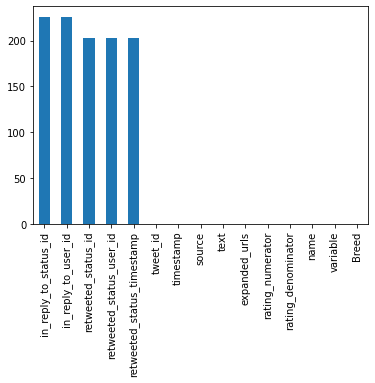

In [39]:
# investigating the data
data.isna().sum().sort_values(ascending=False).plot(kind='bar')
data.tweet_id.duplicated().count()

In [40]:
data.isna().sum().sort_values(ascending=False)

in_reply_to_status_id         226
in_reply_to_user_id           226
retweeted_status_id           203
retweeted_status_user_id      203
retweeted_status_timestamp    203
tweet_id                        0
timestamp                       0
source                          0
text                            0
expanded_urls                   0
rating_numerator                0
rating_denominator              0
name                            0
variable                        0
Breed                           0
dtype: int64

#### Removing the non important columns

In [41]:
# identifying the columns to remove
cols_to_remove = ['retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id','in_reply_to_user_id','in_reply_to_status_id']
# droping the columns
data.drop(axis=1,columns = cols_to_remove,inplace=True)
# rechecking the data for any possible missing values
data.isna().sum().sort_values(ascending=False)

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
variable              0
Breed                 0
dtype: int64

In [42]:
# droping the raws with missing links
data.drop(axis=0,columns=['expanded_urls'],inplace=True)
# rechecking the data fro missing values
data.isna().sum().sort_values(ascending=False)

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
variable              0
Breed                 0
dtype: int64

In [43]:
# Removing the duplicated values
data  = data.drop_duplicates(subset=['tweet_id'],keep = False)
# data.tweet_id.value_counts()

#### Cleaning the date format

In [44]:
data.timestamp = pd.to_datetime(data.timestamp).dt.date
data.timestamp

9       2017-07-26
43      2017-07-09
108     2017-06-04
121     2017-05-30
211     2017-04-12
           ...    
7781    2016-10-07
8029    2016-07-07
8103    2016-06-20
8116    2016-06-16
8151    2016-06-03
Name: timestamp, Length: 214, dtype: object

In [45]:
# setting the time stamp as the data index for the dataframe
data.set_index('timestamp',inplace=True)
data.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,variable,Breed
timestamp,,,,,,,,
2017-07-26,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,doggo
2017-07-09,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,doggo
2017-06-04,871515927908634625,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,doggo
2017-05-30,869596645499047938,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,doggo
2017-04-12,851953902622658560,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,13,10,Astrid,doggo,doggo


In [46]:
data.source[0].split('/')

['<a href="http:',
 '',
 'twitter.com',
 'download',
 'iphone" rel="nofollow">Twitter for iPhone<',
 'a>']

In [47]:
# splitting the source column and creating a new dataframe from it
source_data = data.source.str.split('/',expand=True)
# creating a dataframe from split
source_data = pd.DataFrame(source_data)
# filtering the required columns from the data
source_data['domain'] = source_data[2]
source_data['source_']  = source_data[3]
# getting the columns of interest
source_data = source_data[['domain','source_']]
# source_data.apply(np.where(source_data.source_ == 'a>',source_data.drop(axis=1),source_data.source_))
# removing unwanted part of data
source_data.head()

,domain,source_
timestamp,,
2017-07-26,twitter.com,download
2017-07-09,twitter.com,download
2017-06-04,twitter.com,download
2017-05-30,twitter.com,download
2017-04-12,twitter.com,download


In [48]:
# dropping the source column as it is not that useful now
data.drop('source',axis = 1, inplace=True)

In [49]:
# checking a sample of the dataset
data.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,variable,Breed
timestamp,,,,,,,
2017-05-24,867421006826221569,This is Shikha. She just watched you drop a sk...,12,10,Shikha,puppo,puppo
2015-12-05,672988786805112832,This is Schnozz. He's had a blurred tail since...,10,10,Schnozz,pupper,pupper
2017-05-30,869596645499047938,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,doggo
2017-01-06,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bi...,7,10,Herschel,pupper,pupper
2016-01-18,689143371370250240,Meet Trip. He likes wearing costumes that aren...,10,10,Trip,pupper,pupper


In [50]:
# concatenating the two dataframes
dts = [data,source_data]
# combining the dataframes
merged = pd.concat(dts,axis=1)
merged.head()

,tweet_id,text,rating_numerator,rating_denominator,name,variable,Breed,domain,source_
timestamp,,,,,,,,,
2017-07-26,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,doggo,twitter.com,download
2017-07-09,884162670584377345,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,doggo,twitter.com,download
2017-06-04,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,doggo,twitter.com,download
2017-05-30,869596645499047938,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,doggo,twitter.com,download
2017-04-12,851953902622658560,RT @dog_rates: This is Astrid. She's a guide d...,13,10,Astrid,doggo,doggo,twitter.com,download


In [51]:
merged = merged[merged['source_'] != 'a>']
merged.drop(['variable','tweet_id'],axis=1,inplace=True)
merged.shape

(206, 7)

In [52]:
source_data.shape

(214, 2)

In [53]:
data[data.name =='None'].shape

(0, 7)

## Done With Data Cleaning

In [54]:
# saving the clean dataset into a csv file
merged.to_csv('cleaned_tweets.csv',index = False)

## Data Analysis

In [55]:
merged.head()

,text,rating_numerator,rating_denominator,name,Breed,domain,source_
timestamp,,,,,,,
2017-07-26,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,twitter.com,download
2017-07-09,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,twitter.com,download
2017-06-04,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,twitter.com,download
2017-05-30,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,twitter.com,download
2017-04-12,RT @dog_rates: This is Astrid. She's a guide d...,13,10,Astrid,doggo,twitter.com,download


In [56]:
# sns.pairplot(merged)

In [57]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 2017-07-26 to 2016-06-03
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                206 non-null    object
 1   rating_numerator    206 non-null    int64 
 2   rating_denominator  206 non-null    int64 
 3   name                206 non-null    object
 4   Breed               206 non-null    object
 5   domain              206 non-null    object
 6   source_             206 non-null    object
dtypes: int64(2), object(5)
memory usage: 12.9+ KB


In [58]:
merged.describe()

,rating_numerator,rating_denominator
count,206.000000,206.0
mean,10.995146,10.0
std,2.119589,0.0
min,3.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,27.000000,10.0


<AxesSubplot:>

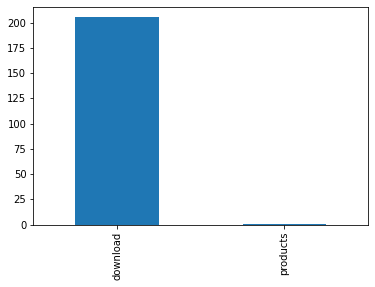

In [59]:
# ploting the unique data values fro product category
merged.source_.value_counts().plot(kind='bar')

Text(0, 0.5, 'Breed Count')

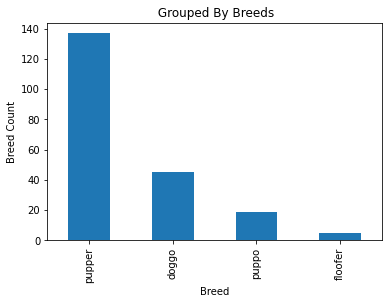

In [60]:
merged.Breed.value_counts().plot(kind='bar')
plt.title(" Grouped By Breeds")
plt.xlabel('Breed')
plt.ylabel('Breed Count')

In [61]:
data.head()

,tweet_id,text,rating_numerator,rating_denominator,name,variable,Breed
timestamp,,,,,,,
2017-07-26,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,doggo
2017-07-09,884162670584377345,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,doggo
2017-06-04,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,doggo
2017-05-30,869596645499047938,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,doggo
2017-04-12,851953902622658560,RT @dog_rates: This is Astrid. She's a guide d...,13,10,Astrid,doggo,doggo


Text(0, 0.5, 'Total animals In the Breed Category')

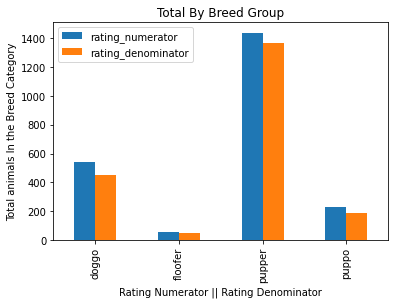

In [62]:
tempdf=merged.reset_index()
grouped_breed=tempdf.groupby(tempdf['Breed'])['rating_numerator', 'rating_denominator'].sum()
# grouped_breed = grouped_breed.sort_values(by=[],ascending=False)
grouped_breed.plot.bar()
plt.title("Total By Breed Group")
plt.xlabel('Rating Numerator || Rating Denominator')
plt.ylabel("Total animals In the Breed Category")

Text(0, 0.5, 'Frequency')

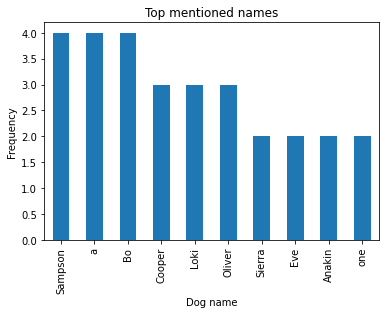

In [63]:
# grouped_by_name=tempdf.groupby('name')['rating_numerator', 'rating_denominator'].sum()
# grouped_by_name
# groupby does not work well with this data
# visualizing the most mentioned dog
merged.name.value_counts().nlargest(10).plot.bar(rot=90)
plt.title("Top mentioned names")
plt.xlabel("Dog name")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

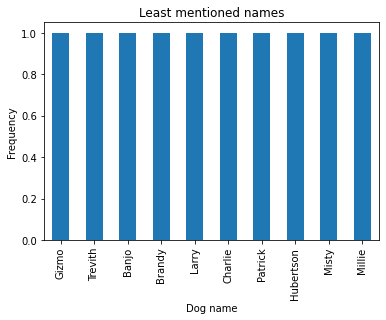

In [64]:
# visualizing the least mentioned dog
merged.name.value_counts().nsmallest(10).plot.bar(rot=90)
plt.title("Least mentioned names")
plt.xlabel("Dog name")
plt.ylabel("Frequency")

Text(0.5, 0, 'Dog name')

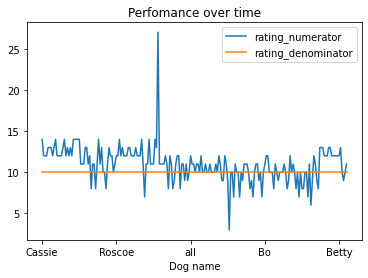

In [65]:
merged.plot('name')
plt.title("Perfomance over time")
plt.xlabel("Dog name")

### End of Analysis